# *Part 2: 311 Customer Service Analysis*

In [79]:
#import the packages
#import the libraries
import os
import sys
assert sys.version_info >= (3,5)
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#view all the columns
pd.options.display.max_columns = False

#consitent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12 
rcParams['ytick.labelsize'] = 12 
rcParams['axes.labelsize'] = 12 

#datetime library 
from datetime import datetime

In [80]:
##load the dataset saved from the previous notebook
customer = pd.read_csv('customer_clean.csv',delimiter=',',engine='python')
customer.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Close Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15.000000000,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16.000000000,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31.000000000,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14.000000000,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02.000000000,3.450556


In [81]:
#check the info to reiterate what we have .. 
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [82]:
# Deep Dive into the City and Street where the problem occurs the max
customer['City'].value_counts().sort_values(ascending=False)

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [83]:
customer['Count'] = 1
city_complaints = customer.groupby(['City','Complaint Type'])['Count'].apply(sum)

In [84]:
pd.pivot_table(customer,values='Count',index=['City','Complaint Type'],aggfunc='sum')

Count
City     Complaint Type                
ARVERNE  Animal Abuse                38
         Blocked Driveway            35
         Derelict Vehicle            27
         Disorderly Youth             2
         Drinking                     1
...                                 ...
Woodside Blocked Driveway            11
         Derelict Vehicle             2
         Illegal Parking            100
         Noise - Commercial           2
         Noise - Street/Sidewalk      5

[764 rows x 1 columns]

We can use this pivot table to see the complaint types of any city. Lets pick BROOKLYN which is one of my favorite places in New York .. 

In [85]:
pd.pivot_table(customer,values='Count',index=['City','Complaint Type'],aggfunc='sum').loc['BROOKLYN']

,Count
Complaint Type,
Animal Abuse,2394
Bike/Roller/Skate Chronic,111
Blocked Driveway,28148
Derelict Vehicle,5181
Disorderly Youth,72
Drinking,257
Graffiti,43
Homeless Encampment,857
Illegal Fireworks,61


In [86]:
brooklyn_complaints = pd.pivot_table(customer,values='Count',index=['City','Complaint Type'],aggfunc='sum').loc['BROOKLYN'].sort_values(by='Count',
                                                                                                                                        ascending=False)

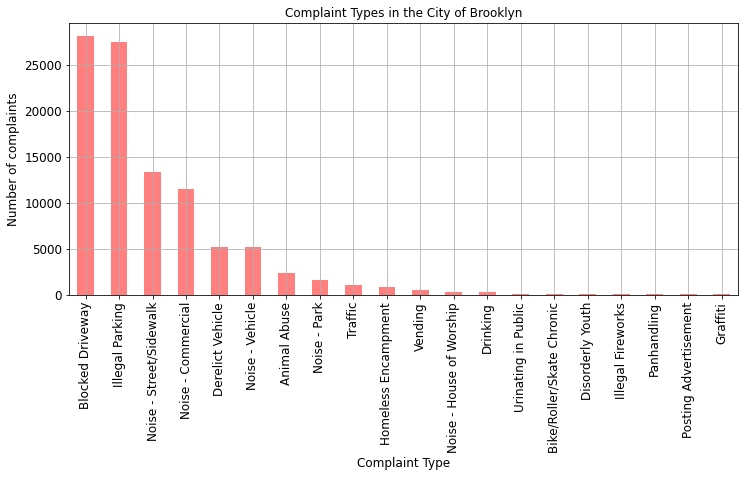

In [87]:
brooklyn_complaints.plot(kind='bar',color='red',alpha=0.5,legend=False)
plt.title('Complaint Types in the City of Brooklyn')
plt.grid(True)
plt.ylabel('Number of complaints')
plt.show()

In the city of Brooklyn, blocked driveway, Illegal Parking and Noise is the maximum complaints. Graffiti complaint types are the least in Brooklyn. 

### *Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations*

In [88]:
pd.pivot_table(customer,values='Close Time',index='Location',aggfunc='mean')

,Close Time
Location,
"(40.49913462101514, -74.24348482977875)",0.197222
"(40.49967332981336, -74.2379063249761)",0.541944
"(40.49994886080869, -74.23740031497493)",10.983611
"(40.49999700116009, -74.23801175120917)",15.166667
"(40.50002168207532, -74.23802262609722)",1.381667
...,...
"(40.91214873879165, -73.9013525396225)",9.219722
"(40.91218391108232, -73.90075914042282)",2.928611
"(40.91220586223159, -73.90075187169981)",2.418056


In [89]:
pd.pivot_table(customer,values='Close Time',index='Location Type',aggfunc='mean').sort_values(by='Close Time',
                                                                                             )

,Close Time
Location Type,
Subway Station,2.370850
Club/Bar/Restaurant,3.101239
House of Worship,3.197221
Store/Commercial,3.301485
Park/Playground,3.452285
Highway,3.723737
Bridge,3.819306
Roadway Tunnel,4.442095
Street/Sidewalk,4.475255


## *Hypothesis Testing*
- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?
 

In [90]:
#import the one way module from scipy-stats
from scipy.stats import f_oneway

In [91]:
df = customer[['Complaint Type','Close Time']].dropna()

In [92]:
#Create data for ANOVA test 
data1 = df[df['Complaint Type'] == 'Illegal Parking']['Close Time']
data2 = df[df['Complaint Type'] == 'Blocked Driveway']['Close Time']
data3 = df[df['Complaint Type'] == 'Noise - Street/Sidewalk']['Close Time']

In [93]:
#One Way ANOVA .. 
f_value, p_value = f_oneway(data1, data2, data3)
print('f_value=%.3f, p=%.3f' % (f_value,p_value))
if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

f_value=812.658, p=0.000
Probably different distributions


### *ANOVA and Multiple Comparison of Means(Post hoc test)*
This will be used to test the first hypothesis 
- H0: Mean Close Time is same across the various Complaint Types
- Ha: Mean Close Time is not same across the various Complaint Types


In [94]:
df

,Complaint Type,Close Time
0,Noise - Street/Sidewalk,0.920833
1,Blocked Driveway,1.437778
2,Blocked Driveway,4.858611
3,Illegal Parking,7.753889
4,Illegal Parking,3.450556
...,...,...
300692,Noise - Commercial,0.641389
300694,Blocked Driveway,2.008611
300695,Noise - Commercial,3.121389
300696,Noise - Commercial,4.092500


In [95]:
#blank spaces create problem while running the ANOVA test using OLS method
df.rename(columns={'Complaint Type':'Complaint_Type','Close Time':'Close_Time'},inplace=True)

In [96]:
df

,Complaint_Type,Close_Time
0,Noise - Street/Sidewalk,0.920833
1,Blocked Driveway,1.437778
2,Blocked Driveway,4.858611
3,Illegal Parking,7.753889
4,Illegal Parking,3.450556
...,...,...
300692,Noise - Commercial,0.641389
300694,Blocked Driveway,2.008611
300695,Noise - Commercial,3.121389
300696,Noise - Commercial,4.092500


In [97]:
#ANOVA using OLS
from statsmodels.formula.api import ols
model = ols('Close_Time ~ C(Complaint_Type)',df).fit()

In [98]:
#print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Close_Time   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     514.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:16:47   Log-Likelihood:            -9.5737e+05
No. Observations:              298534   AIC:                         1.915e+06
Df Residuals:                  298511   BIC:                         1.915e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          5.2603      2.440      2.156      0.031       0.477      10.043
C(Complaint_Type)[T.Animal Abuse]                 -0.0471      2.441     -0.019      0.985      -4.832       4.738
C(Complaint_Type)[T.Animal in a Park]            331.5744      6.456     51.356      0.000     318.920     344.229
C(Complaint_Type)[T.Bike/Roller/Skate Chronic]    -1.4939      2.458     -0.608      0.543      -6.311       3.323
C(Complaint_Type)[T.Blocked Driveway]             -0.5194      2.440     -0.213      0.831      -5.303       4.264
C(Complaint_Type)[T.Derelict Vehicle]              2.1038      2.441      0.862      0.389      -2.680       6.888
C(Complaint_Type)[T.Disorderly Youth]             -1.7017      2.466     -0.690      0.490      -6.535       3.131
C(Complaint_Type)[T.Drinking]                     -1.3985      2.446     -0.572      0.568      -6.193       3.396
C(Complaint_Type)[T.Graffiti]                      1.8909      2.504      0.755      0.450      -3.017       6.799
C(Complaint_Type)[T.Homeless Encampment]          -0.8948      2.442     -0.366      0.714      -5.681       3.891
C(Complaint_Type)[T.Illegal Fireworks]            -2.4992      2.484     -1.006      0.314      -7.367       2.368
C(Complaint_Type)[T.Illegal Parking]              -0.7592      2.440     -0.311      0.756      -5.542       4.024
C(Complaint_Type)[T.Noise - Commercial]           -2.1132      2.441     -0.866      0.387      -6.897       2.670
C(Complaint_Type)[T.Noise - House of Worship]     -2.0670      2.448     -0.844      0.398      -6.865       2.731
C(Complaint_Type)[T.Noise - Park]                 -1.8496      2.442     -0.757      0.449      -6.636       2.937
C(Complaint_Type)[T.Noise - Street/Sidewalk]      -1.8151      2.440     -0.744      0.457      -6.598       2.968
C(Complaint_Type)[T.Noise - Vehicle]              -1.6713      2.441     -0.685      0.493      -6.455       3.112
C(Complaint_Type)[T.Panhandling]                  -0.8876      2.464     -0.360      0.719      -5.717       3.942
C(Complaint_Type)[T.Posting Advertisement]        -3.2845      2.452     -1.340      0.180      -8.090       1.521
C(Complaint_Type)[T.Squeegee]                     -1.2147      3.858     -0.315      0.753      -8.777       6.348
C(Complaint_Type)[T.Traffic]                      -1.8116      2.442     -0.742      0.458      -6.598       2.974
C(Complaint_Type)[T.Urinating in Public]          -1.6337      2.453     -0.666      0.505      -6.441       3.173
C(Complaint_Type)[T.Vending]                      -1.2464      2.442     -0.510      0.610      -6.033       3.540
==============================================================================
Omnibus:      

In [99]:
import statsmodels.api as sm
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 22, 298511) =  514.177, p =  0.0000


,sum_sq,df,F,PR(>F)
C(Complaint_Type),4.041804e+05,22.0,514.177089,0.0
Residual,1.066596e+07,298511.0,NaN,NaN


The p-value is less than 0.05 (our selected alpha). Hence we  reject the null hypothesis. 
- H0: Mean Close Time is same across the various Complaint Types
- Ha: Mean Close Time is not same across the various Complaint Types

In [100]:
#run pairwise statistical test 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Close_Time'],df['Complaint_Type']))

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------
            Agency Issues              Animal Abuse   -0.0471    0.9   -8.8742      8.78  False
            Agency Issues          Animal in a Park  331.5744  0.001   308.229  354.9198   True
            Agency Issues Bike/Roller/Skate Chronic   -1.4939    0.9  -10.3798    7.3921  False
            Agency Issues          Blocked Driveway   -0.5194    0.9   -9.3435    8.3046  False
            Agency Issues          Derelict Vehicle    2.1038    0.9   -6.7214    10.929  False
            Agency Issues          Disorderly Youth   -1.7017    0.9  -10.6175    7.2141  False
            Agency Issues                  Drinking   -1.3985    0.9  -10.2429     7.446  False
            Agency Issues               

##### <span style='color:red'> *The average response time to close the complaint is not similar across the overall complaint types as the p-value is less than 0.05. Hence we reject the Null Hypothesis.* </span>

### *Are the type of complaint or service requested and location related?*
- H0: There is no relationship between the Complaint Type and the Location
- Ha: There is a relationship between the Complaint Type and the Location

In [107]:
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    stat, p, dof, expected =  chi2_contingency(ctsum.fillna(0))
    return stat,p,dof
stat,p,dof = chisq_of_df_cols(customer,'City','Complaint Type')

In [110]:
#check the p value
print('The p-value of the Chi-Square test is %.2f' %(p))
if p < alpha:
    print('Reject the Null Hypothesis')
else:
    print('FA')

The p-value of the Chi-Square test is 0.00


#### <span style='color:red'>*Reject the Null Hypothesis. There is a relationship between the location and the Complaint Type*</span>